# Exploratory Analysis of train and test dataset for second submission

Based on EDA on train and test dataset, we believe that four variables, excluding minority, will cause bias in our model toward minorities. The following variables should be excluded:
    1. occupation
    2. rent
    3. ZIP
    4. job_stability

According to discrimination regulation, default models are not allowed to use information that discriminates against an applicant based on race, gender, religion, etc. Thus, excluding minority and gender from our dataset should reduce bias against minorities. 

Unfortunately, the train dataset contains four variables that correlate strongly with minority and default. Therefore, excluding minority still causes the model to be biased since the bias can still be found in these variables. For example, minorities may live in specific ZIP codes, thus, ZIP code acts as a proxy for minority.

While, the test dataset does not contain any proxy for minority. Thus, we need to exclude four variables from our train dataset to reduce bias against minority. 

In [1]:
#importing packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#setting default precision
pd.options.display.float_format = "{:.2f}".format
sns.set(color_codes=True)
%matplotlib inline 

/Users/Rolf/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
train_df = "train.csv"
df_train = pd.read_csv(train_df, index_col = 0)

# moving target col to end
cols = list(df_train.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove default from list
df_train = df_train[cols+['default']]

# turn zip and occupation to categorical variables
df_train['ZIP'] = pd.Categorical(df_train.ZIP)
df_train['occupation'] = pd.Categorical(df_train.occupation)
df_train["default"] = df_train["default"].astype(int)
print('Shape of train: ' + str(df_train.shape))
df_train.head()

Shape of train: (480000, 13)


,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,occupation,default
0,1,0,MT04PA,1,57.23,36.05,205168.02,7600.29,3.30,0,3.02,MZ10CD,1
1,1,0,MT04PA,1,45.89,59.53,187530.41,5534.27,3.84,0,5.94,MZ10CD,1
2,1,0,MT04PA,1,46.78,67.34,196912.01,2009.90,2.06,0,2.19,MZ10CD,1
3,1,0,MT04PA,1,41.78,24.07,132911.65,3112.28,3.94,0,1.73,MZ10CD,1
4,1,0,MT04PA,1,41.74,47.50,161162.55,1372.08,3.71,0,0.88,MZ10CD,1


In [42]:
test_df = "test.csv"
df_test = pd.read_csv(test_df, index_col = 0)
df_test.drop('Unnamed: 0.1', inplace=True, axis=1)

# moving target col to end
cols = list(df_test.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove default from list
df_test = df_test[cols+['default']]

# turn zip and occupation to categorical variables
df_test['ZIP'] = pd.Categorical(df_test.ZIP)
df_test['occupation'] = pd.Categorical(df_test.occupation)
df_test["default"] = df_test["default"].astype(int)
print('Shape of test: ' + str(df_test.shape))
df_test.head()

Shape of test: (160000, 13)


,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,occupation,default
0,1,0,MT04PA,1,51.27,25.71,166455.21,8064.95,3.87,30,43.76,MZ10CD,1
1,0,0,MT04PA,0,58.88,39.69,216752.89,7166.70,3.81,30,46.90,MZ01CD,0
2,0,0,MT04PA,0,56.50,25.85,183764.48,3322.05,3.50,30,63.45,MZ01CD,0
3,1,0,MT04PA,1,47.07,26.38,154057.01,15.22,3.54,30,56.24,MZ10CD,0
4,1,0,MT04PA,1,48.92,18.78,143463.04,7860.53,3.66,30,49.88,MZ10CD,0


### The following columns have a different mean in train vs test

    1. rent (0.47 vs 0.27)
    2. education (26.02 vs 47.50)
    3. income (96k vs 175k)
    4. year (14.5 vs 39.5)
    5. job_stability (45.99 vs 70.02)
    6. default (0.50 vs 0.15)

In [12]:
# we see that minority and sex are evenly represented in the dataset
df_train.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default
count,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00,480000.00
mean,0.50,0.50,0.47,26.02,42.99,96223.63,5005.00,3.00,14.50,45.99,0.50
std,0.50,0.50,0.50,24.55,14.43,91722.30,2887.15,1.00,8.66,45.07,0.50
min,0.00,0.00,0.00,0.00,18.00,7.31,0.04,-12.46,0.00,0.01,0.00
25%,0.00,0.00,0.00,1.68,30.47,6181.59,2503.58,2.62,7.00,1.67,0.00
50%,0.00,0.50,0.00,20.28,43.00,70380.19,5008.80,3.31,14.50,31.24,0.00
75%,1.00,1.00,1.00,49.71,55.47,183477.24,7503.32,3.71,22.00,89.45,1.00
max,1.00,1.00,1.00,89.31,68.00,350173.90,9999.99,4.00,29.00,149.91,1.00


In [9]:
df_test.describe()

,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default
count,160000.00,160000.00,160000.00,160000.00,160000.00,160000.00,160000.00,160000.00,160000.00,160000.00,160000.00
mean,0.50,0.50,0.27,47.50,42.97,175638.46,5010.29,3.00,39.50,70.02,0.15
std,0.50,0.50,0.45,7.35,14.42,32370.35,2885.21,1.00,5.77,22.80,0.36
min,0.00,0.00,0.00,22.45,18.00,69311.37,0.24,-7.22,30.00,23.01,0.00
25%,0.00,0.00,0.00,42.36,30.47,152520.01,2513.86,2.62,34.75,49.72,0.00
50%,1.00,0.50,0.00,47.12,42.98,173749.62,5014.71,3.31,39.50,65.36,0.00
75%,1.00,1.00,1.00,52.27,55.42,196641.96,7512.48,3.71,44.25,89.40,0.00
max,1.00,1.00,1.00,88.60,68.00,366778.94,9999.96,4.00,49.00,147.87,1.00


## Detecting outliers in train

We are removing the outliers from the payment timing column and dropping the rows where we are more than 3 STDs of the mean.

In [16]:
# using z score as signed number of standard deviations by which the value is above mean value
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
z_values = abs(df_train[numeric_cols].apply(stats.zscore))
z_values[z_values > 3.0].count()
df_train['outliers']=z_values.max(axis=1)
df_train = df_train[df_train['outliers'] < 3]  
df_train.drop('outliers', axis = 1,inplace = True)
print('shape after 8k outliers have been removed: ' + str(df_train.shape))

shape after 8k outliers have been removed: (459179, 13)


## checking for uneven distribution

### Minorities

train dataset has a different default rate with respect to minority compared to test dataset

    1. train dataset = default observed only in minority
        a. default rate for minority = 100%
        b. default rate for non-minority = 0%
        
    2. test dataset = same default rate observed for minority and non-minority
        a. default rate for minority = 15%
        b. default rate for non-minority = 15%

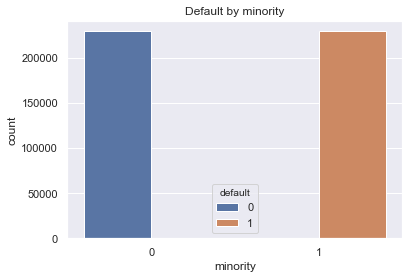

In [17]:
#looking at target by minority
ax = sns.countplot(x="minority", hue= "default", data= df_train)
ax.set_title("Default by minority")
ax

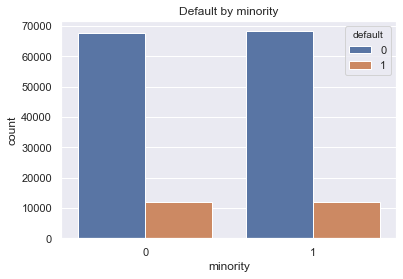

In [18]:
#looking at target by minority
ax = sns.countplot(x="minority", hue= "default", data= df_test)
ax.set_title("Default by minority")
ax

In [29]:
#default rate for train dataset with respect to minority
default_train = df_train.groupby(["minority", "default"])["minority"].count()
default_minority = default_train[1,1] / sum(default_train[1])
default_non_minority = default_train[0,1] / sum(default_train[0])

print('Train default rate minority: ' + str(round(default_minority*100, 2)) + '%')
print('Train default rate non-minority: ' + str(round(default_non_minority*100, 2)) + '%')

Train default rate minority: 99.89%
Train default rate non-minority: 0.14%


In [30]:
#default rate for test dataset with respect to minority
default_test = df_test.groupby(["minority", "default"])["minority"].count()
default_minority_test = default_test[1,1] / sum(default_test[1])
default_non_minority_test = default_test[0,1] / sum(default_test[0])

print('Test default rate minority: ' + str(round(default_minority_test*100, 2)) + '%')
print('Test default rate non-minority: ' + str(round(default_non_minority_test*100, 2)) + '%')

Test default rate minority: 15.03%
Test default rate non-minority: 14.9%


## Correlation of minority and default in train dataset

Overall, to reduce the effect of minority on the model, four variables need to be excluded since they correlate highly with both minority and default. The following variables need to be excluded to reduce bias toward minority:
    1. occupation
    2. rent
    3. ZIP
    4. job_stability

<b>Observations of correlations with minority:</b>
    1. Perfect positive correlation with default (1)
    2. High positive correlation with occupation (0.9)
        a. occupation_0 (-1)
        b. occupation_1 (0.58)
        c. occupation_2 (0.58)
    3. High positive correlation with rent (0.85)
    4. High negative correlation with ZIP (-0.89)
        a. ZIP_0 (0.58)
        b. ZIP_1 (0.58)
        c. ZIP_2 (-0.58)
        d. ZIP_3 (-0.58)
    5. High negative correlation with job_stability (-0.97)

    
    
<b>Observations of correlations with default:</b>
    1. Perfect positive correlation with minority (1)
    2. High positive correlation with occupation (0.9)
        a. occupation_0 (-1)
        b. occupation_1 (0.58)
        c. occupation_2 (0.58)
    3. High positive correlation with rent (0.85)
    4. High negative correlation with job_stability (-0.98)
    5. High negative correlation with ZIP (-0.89)
        a. ZIP_0 (0.58)
        b. ZIP_1 (0.58)
        c. ZIP_2 (-0.58)
        d. ZIP_3 (-0.58)

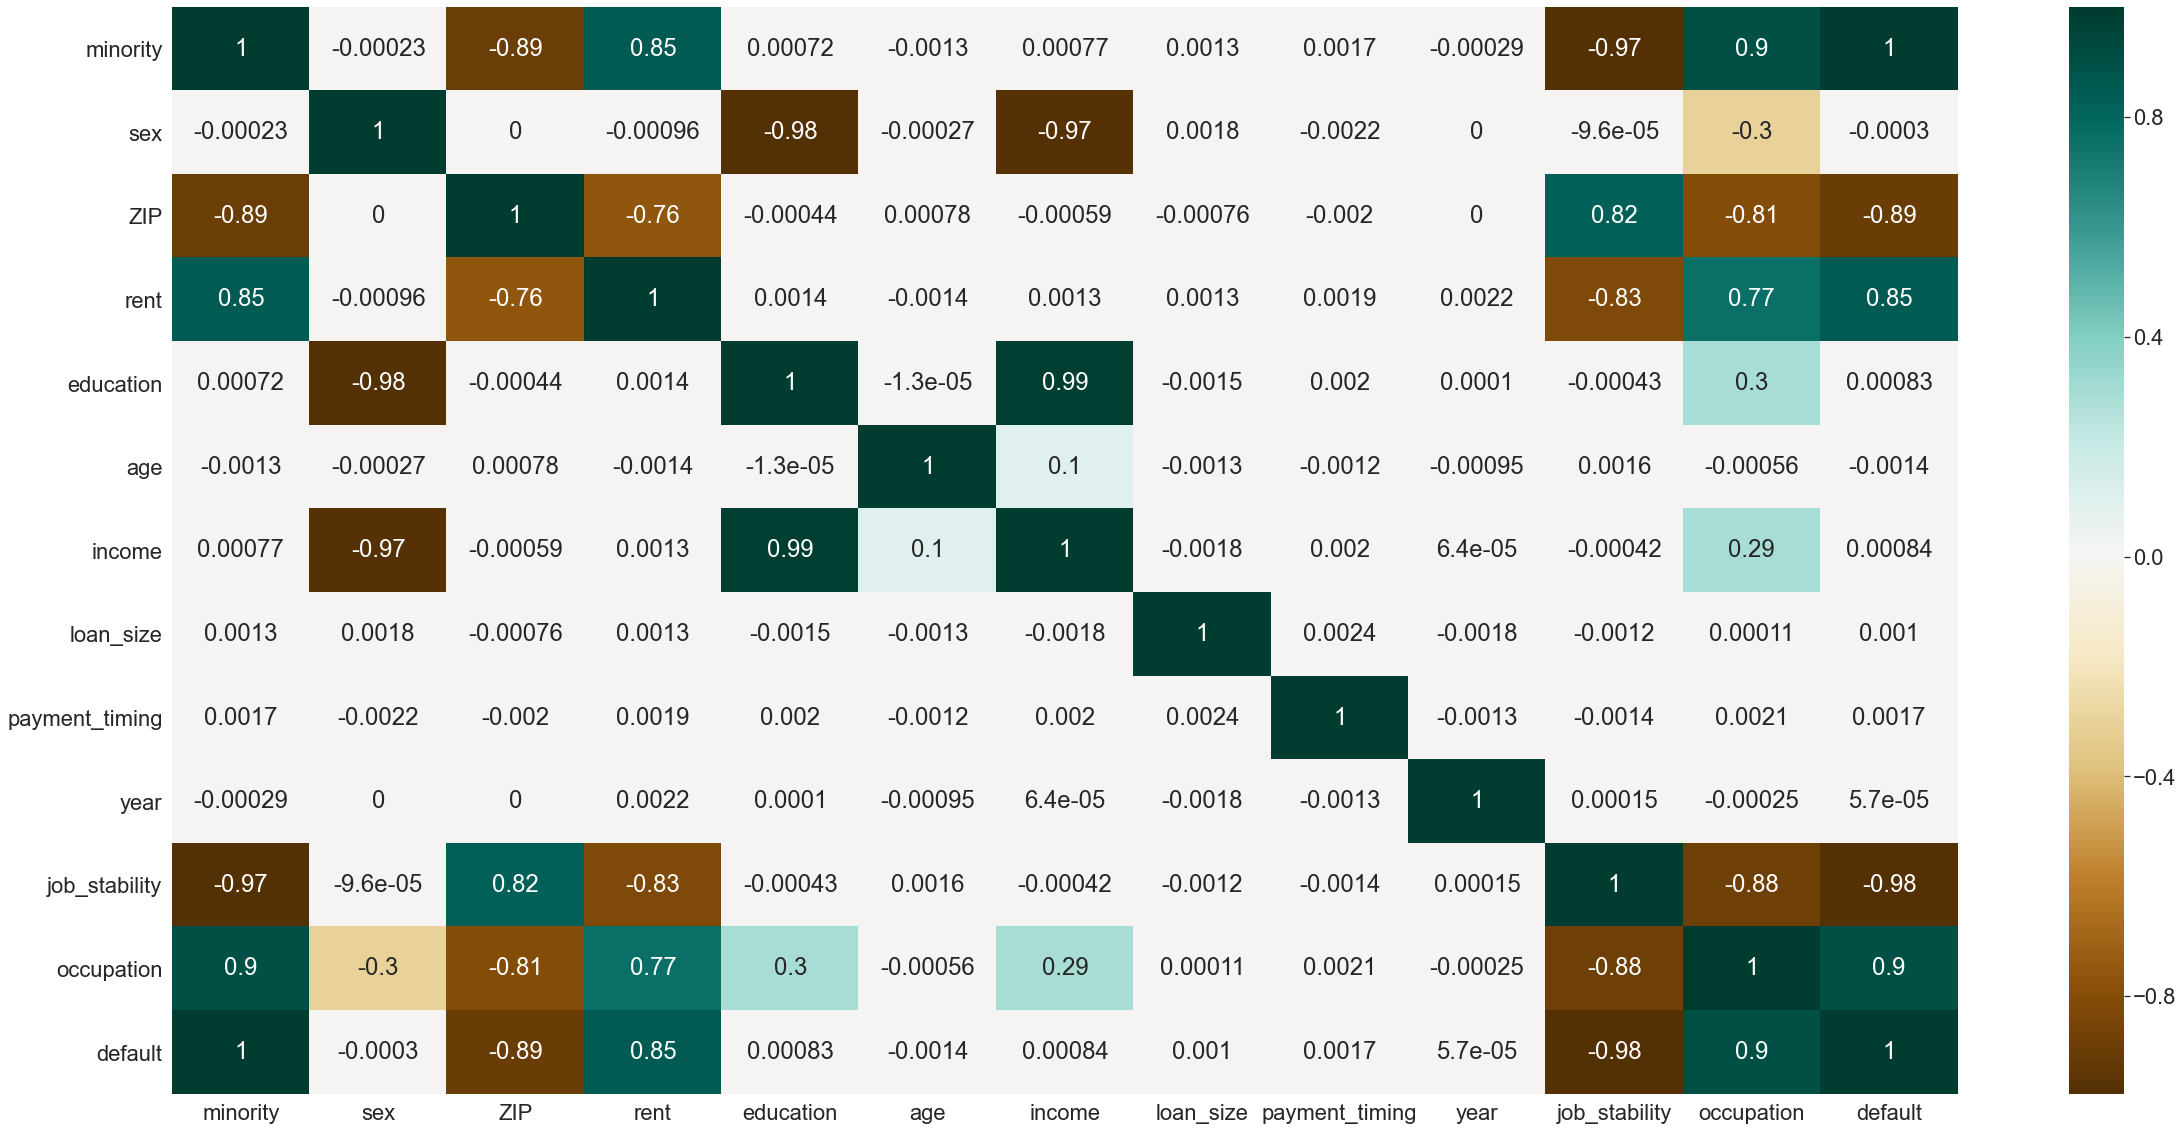

In [43]:
#convert categorical values to numeric
zip_values = dict(zip(set(df_train['ZIP']), range(len(df_train['ZIP']))))
occupation_values = dict(zip(set(df_train['occupation']), range(len(df_train['occupation']))))

df_train['ZIP'] = [zip_values[x] for x in df_train['ZIP']]
df_train['occupation'] = [occupation_values[x] for x in df_train['occupation']]

#plot correlation heatmap
plt.figure(figsize=(40,20))
c= df_train.corr()
sns.set(font_scale= 2)
sns.heatmap(c,cmap="BrBG",annot=True)

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def get_dummies(df, column_name):
    print(df[column_name].unique())
    gen_features = pd.get_dummies(df[column_name],prefix = column_name, prefix_sep= '_')
    df = pd.concat([df,gen_features], axis=1)
    df = df.drop([column_name], axis=1)
    return df

In [49]:
df_train = get_dummies(df_train, 'ZIP')
df_train = get_dummies(df_train, 'occupation')

# moving target col to end
cols = list(df_train.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove default from list
df_train = df_train[cols+['default']]

[1 0 3 2]
[2 1 0]


,minority,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,ZIP_0,ZIP_1,ZIP_2,ZIP_3,occupation_0,occupation_1,occupation_2,default
0,1,0,1,57.23,36.05,205168.02,7600.29,3.30,0,3.02,0,1,0,0,0,0,1,1
1,1,0,1,45.89,59.53,187530.41,5534.27,3.84,0,5.94,0,1,0,0,0,0,1,1
2,1,0,1,46.78,67.34,196912.01,2009.90,2.06,0,2.19,0,1,0,0,0,0,1,1
3,1,0,1,41.78,24.07,132911.65,3112.28,3.94,0,1.73,0,1,0,0,0,0,1,1
4,1,0,1,41.74,47.50,161162.55,1372.08,3.71,0,0.88,0,1,0,0,0,0,1,1


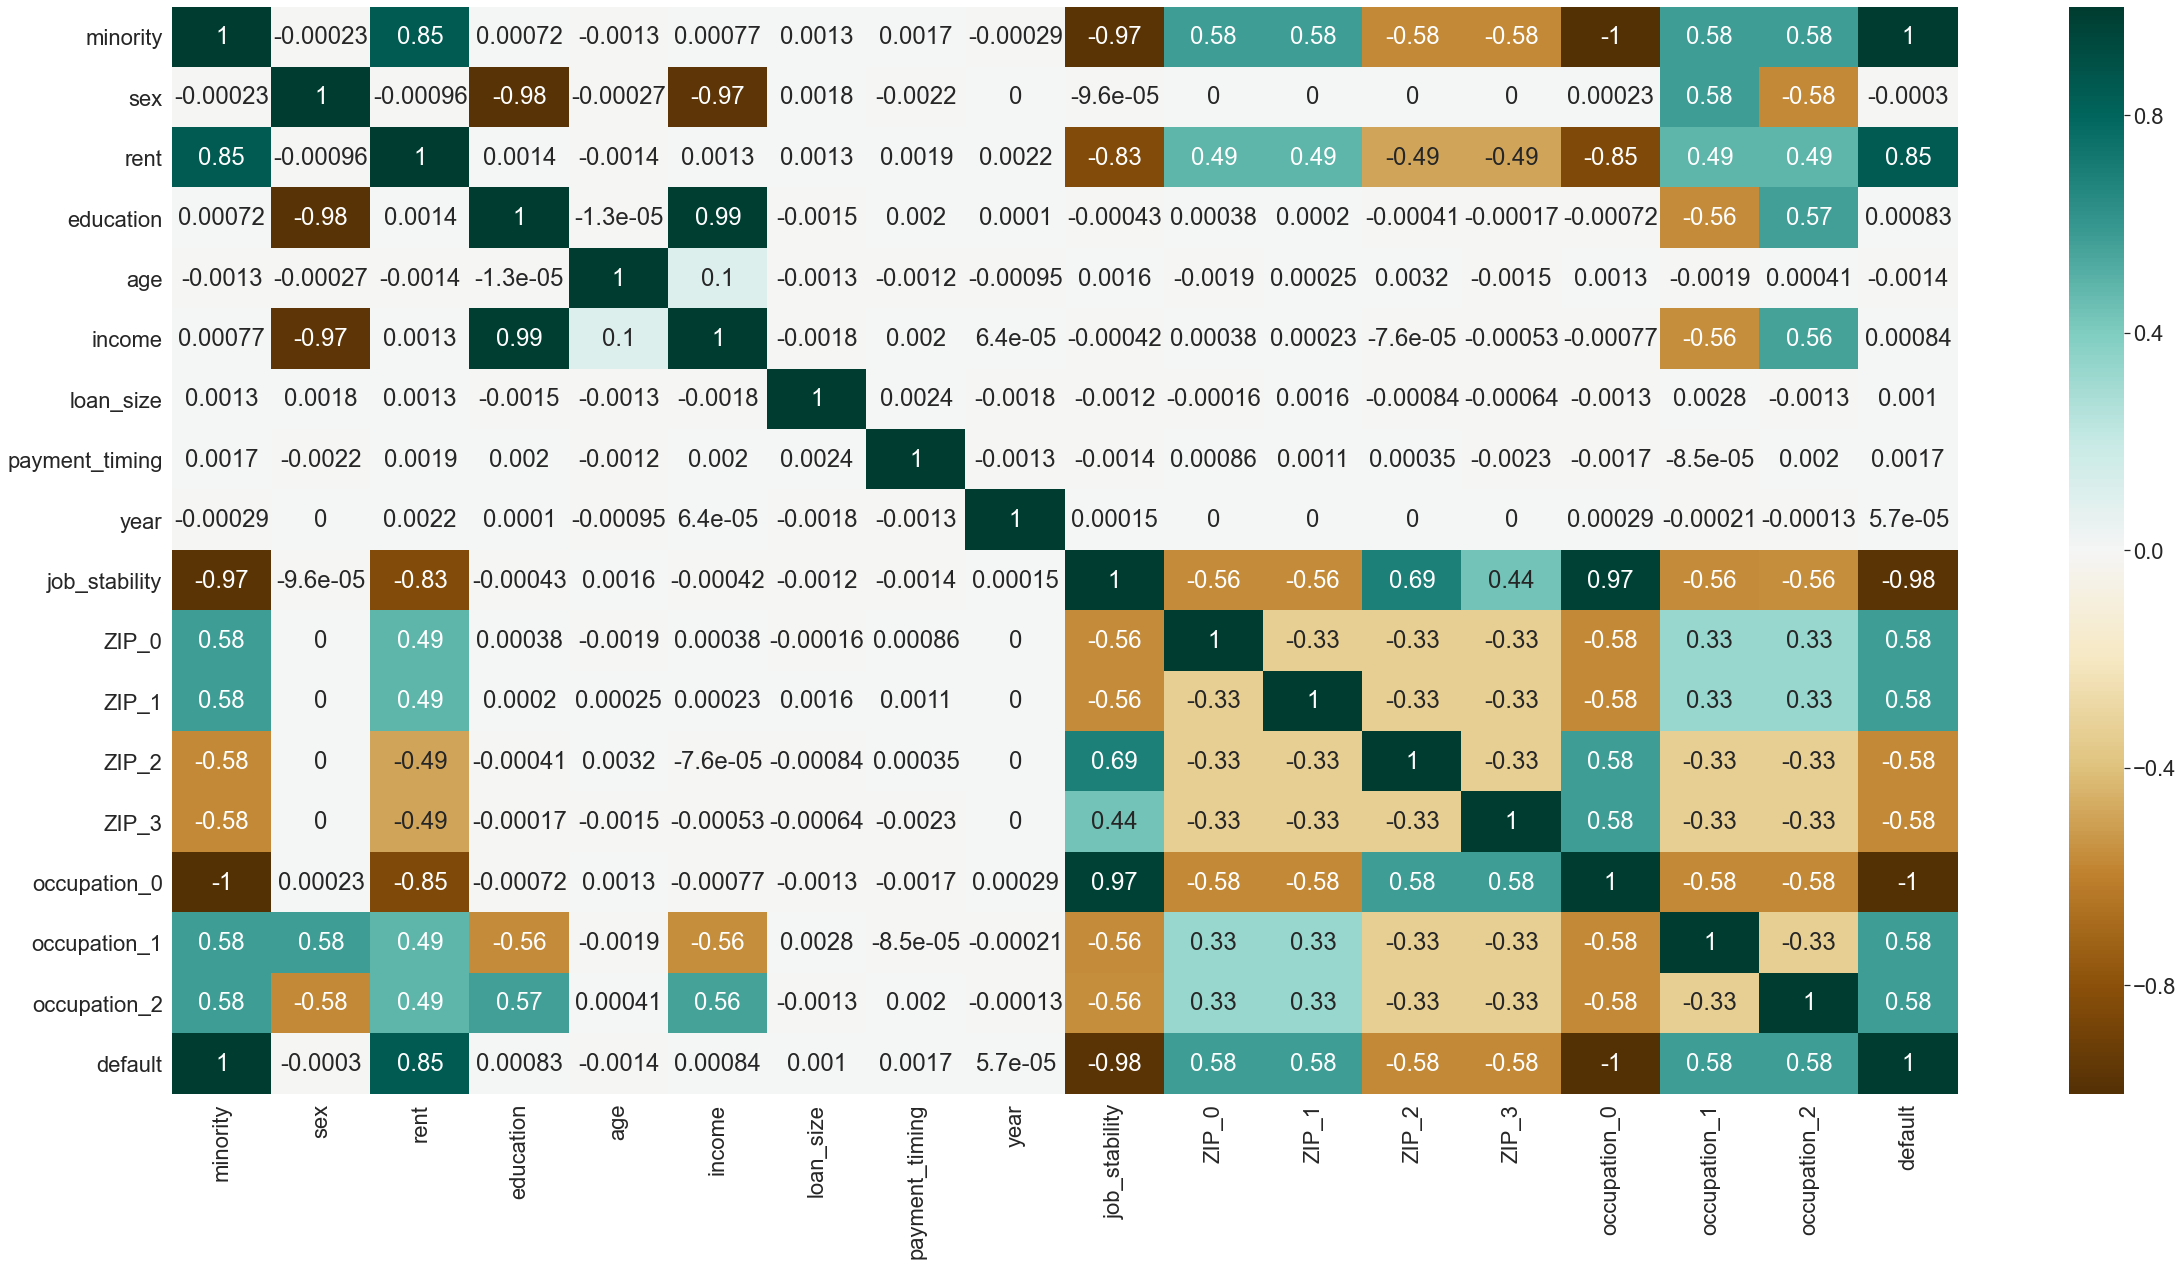

In [51]:
plt.figure(figsize=(40,20))
c= df_train.corr()
sns.set(font_scale= 2)
sns.heatmap(c,cmap="BrBG",annot=True)

## Correlation of minority and default in test dataset

Overall, the test dataset does not seem to contain bias toward minority since the only variable that correlates with minority is occupation. While, occupation does not correlate with default.

<b>Observations of correlations with minority:</b>
    1. No correlation with default (0)
    2. High positive correlation with occupation (0.9)
        a. occupation_0 (-1)
        b. occupation_1 (0.58)
        c. occupation_2 (0.58)
    3. No correlation with rent (0)
    4. No correlation with ZIP (0)
        a. ZIP_0 (0)
        b. ZIP_1 (0)
        c. ZIP_2 (0)
        d. ZIP_3 (0)
    5. No correlation with job_stability (0)

    
    
<b>Observations of correlations with default:</b>
    1. No correlation with minority (0)
    2. No correlation with occupation (0)
        a. occupation_0 (0)
        b. occupation_1 (0)
        c. occupation_2 (0)
    3. Small positive correlation with rent (0.18)
    4. Medium negative correlation with job_stability (-0.51)
    5. Small negative correlation with ZIP (-0.38)
        a. ZIP_0 (0.24)
        b. ZIP_1 (0.24)
        c. ZIP_2 (-0.24)
        d. ZIP_3 (-0.24)

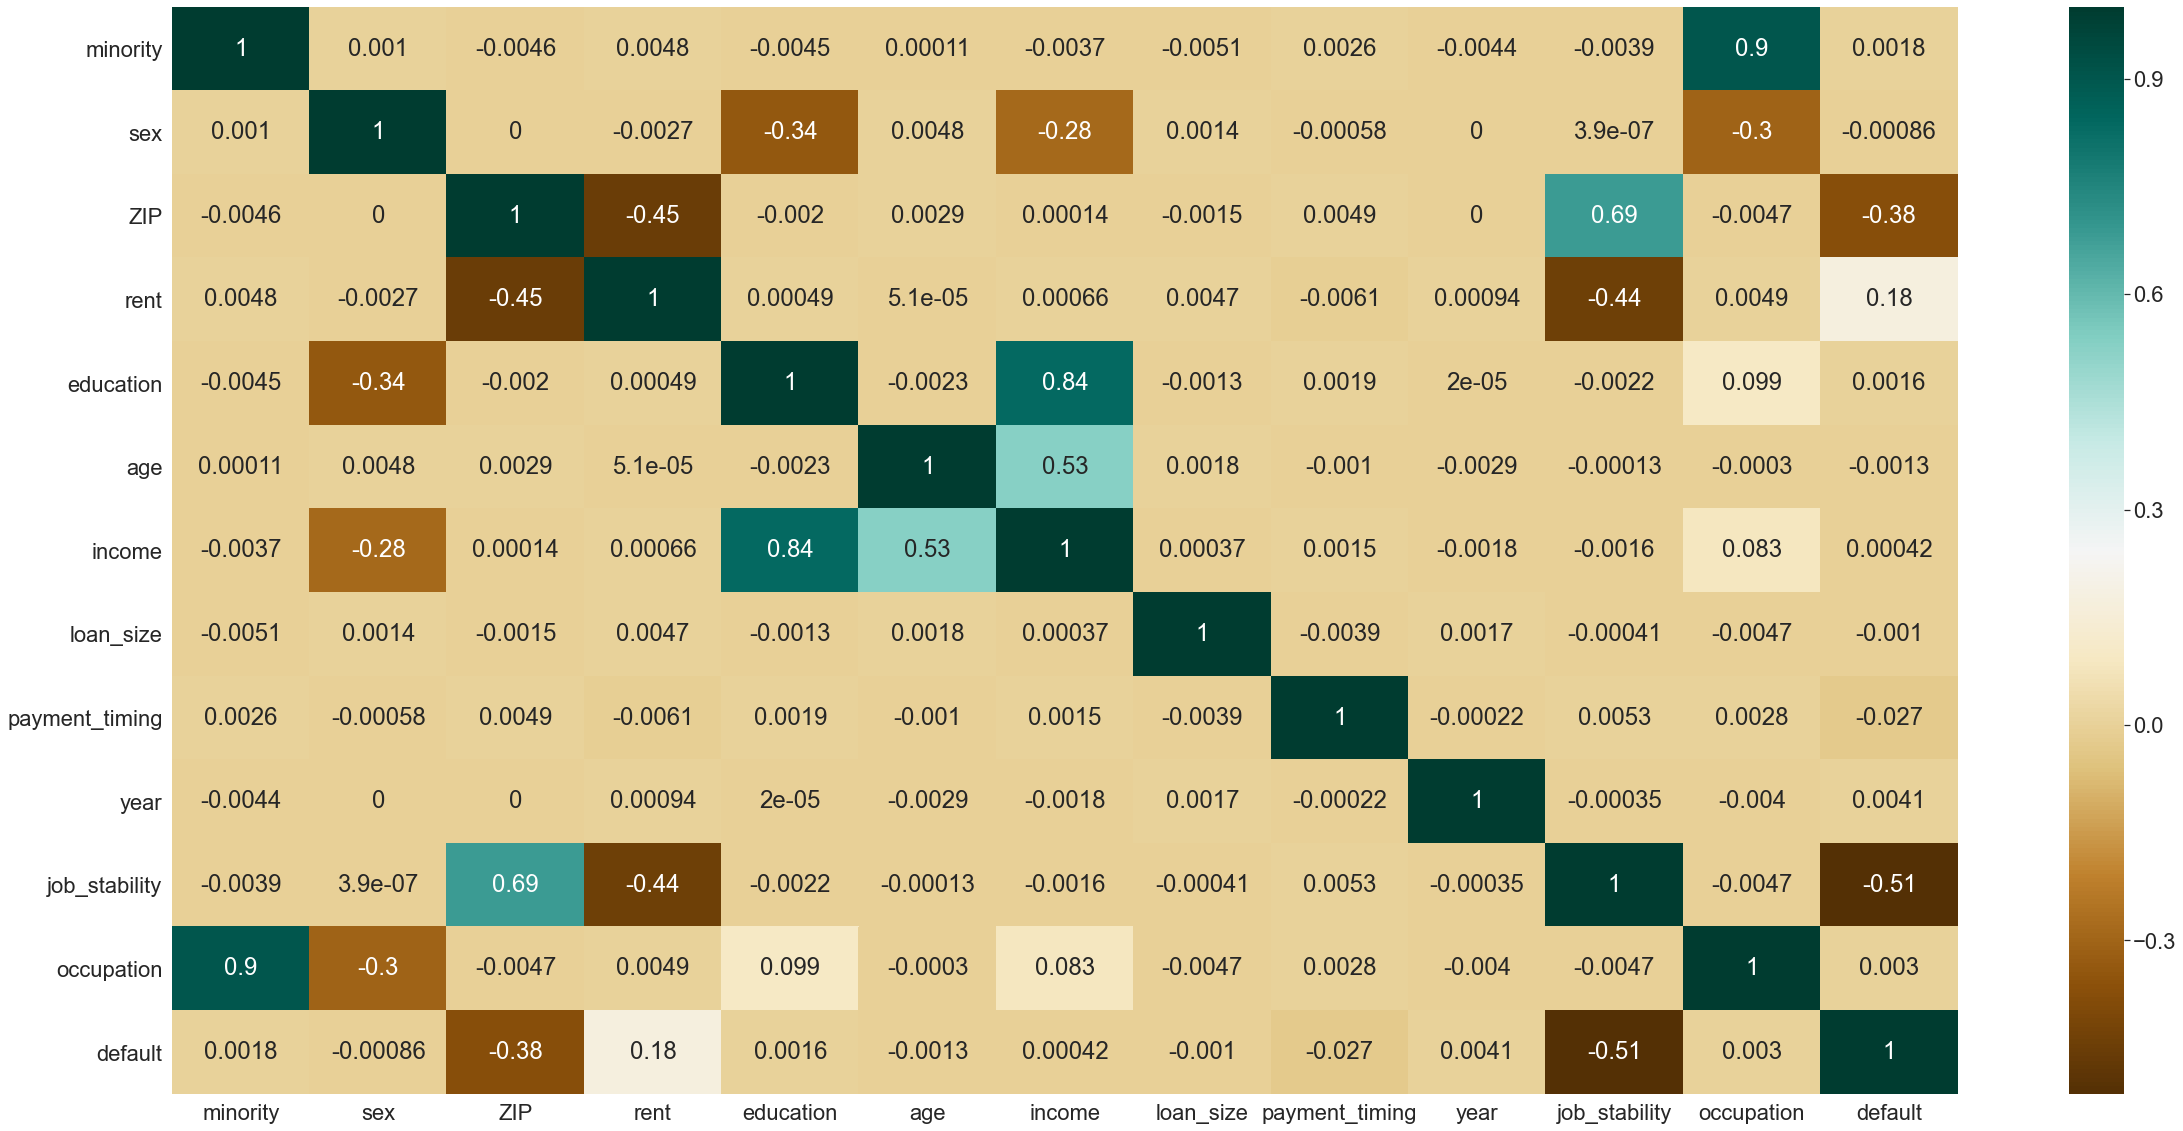

In [46]:
df_test['ZIP'] = [zip_values[x] for x in df_test['ZIP']]
df_test['occupation'] = [occupation_values[x] for x in df_test['occupation']]

#plot correlation heatmap
plt.figure(figsize=(40,20))
c= df_test.corr()
sns.set(font_scale= 2)
sns.heatmap(c,cmap="BrBG",annot=True)

In [52]:
df_test = get_dummies(df_test, 'ZIP')
df_test = get_dummies(df_test, 'occupation')

# moving target col to end
cols = list(df_test.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove default from list
df_test = df_test[cols+['default']]

[1 0 3 2]
[2 0 1]


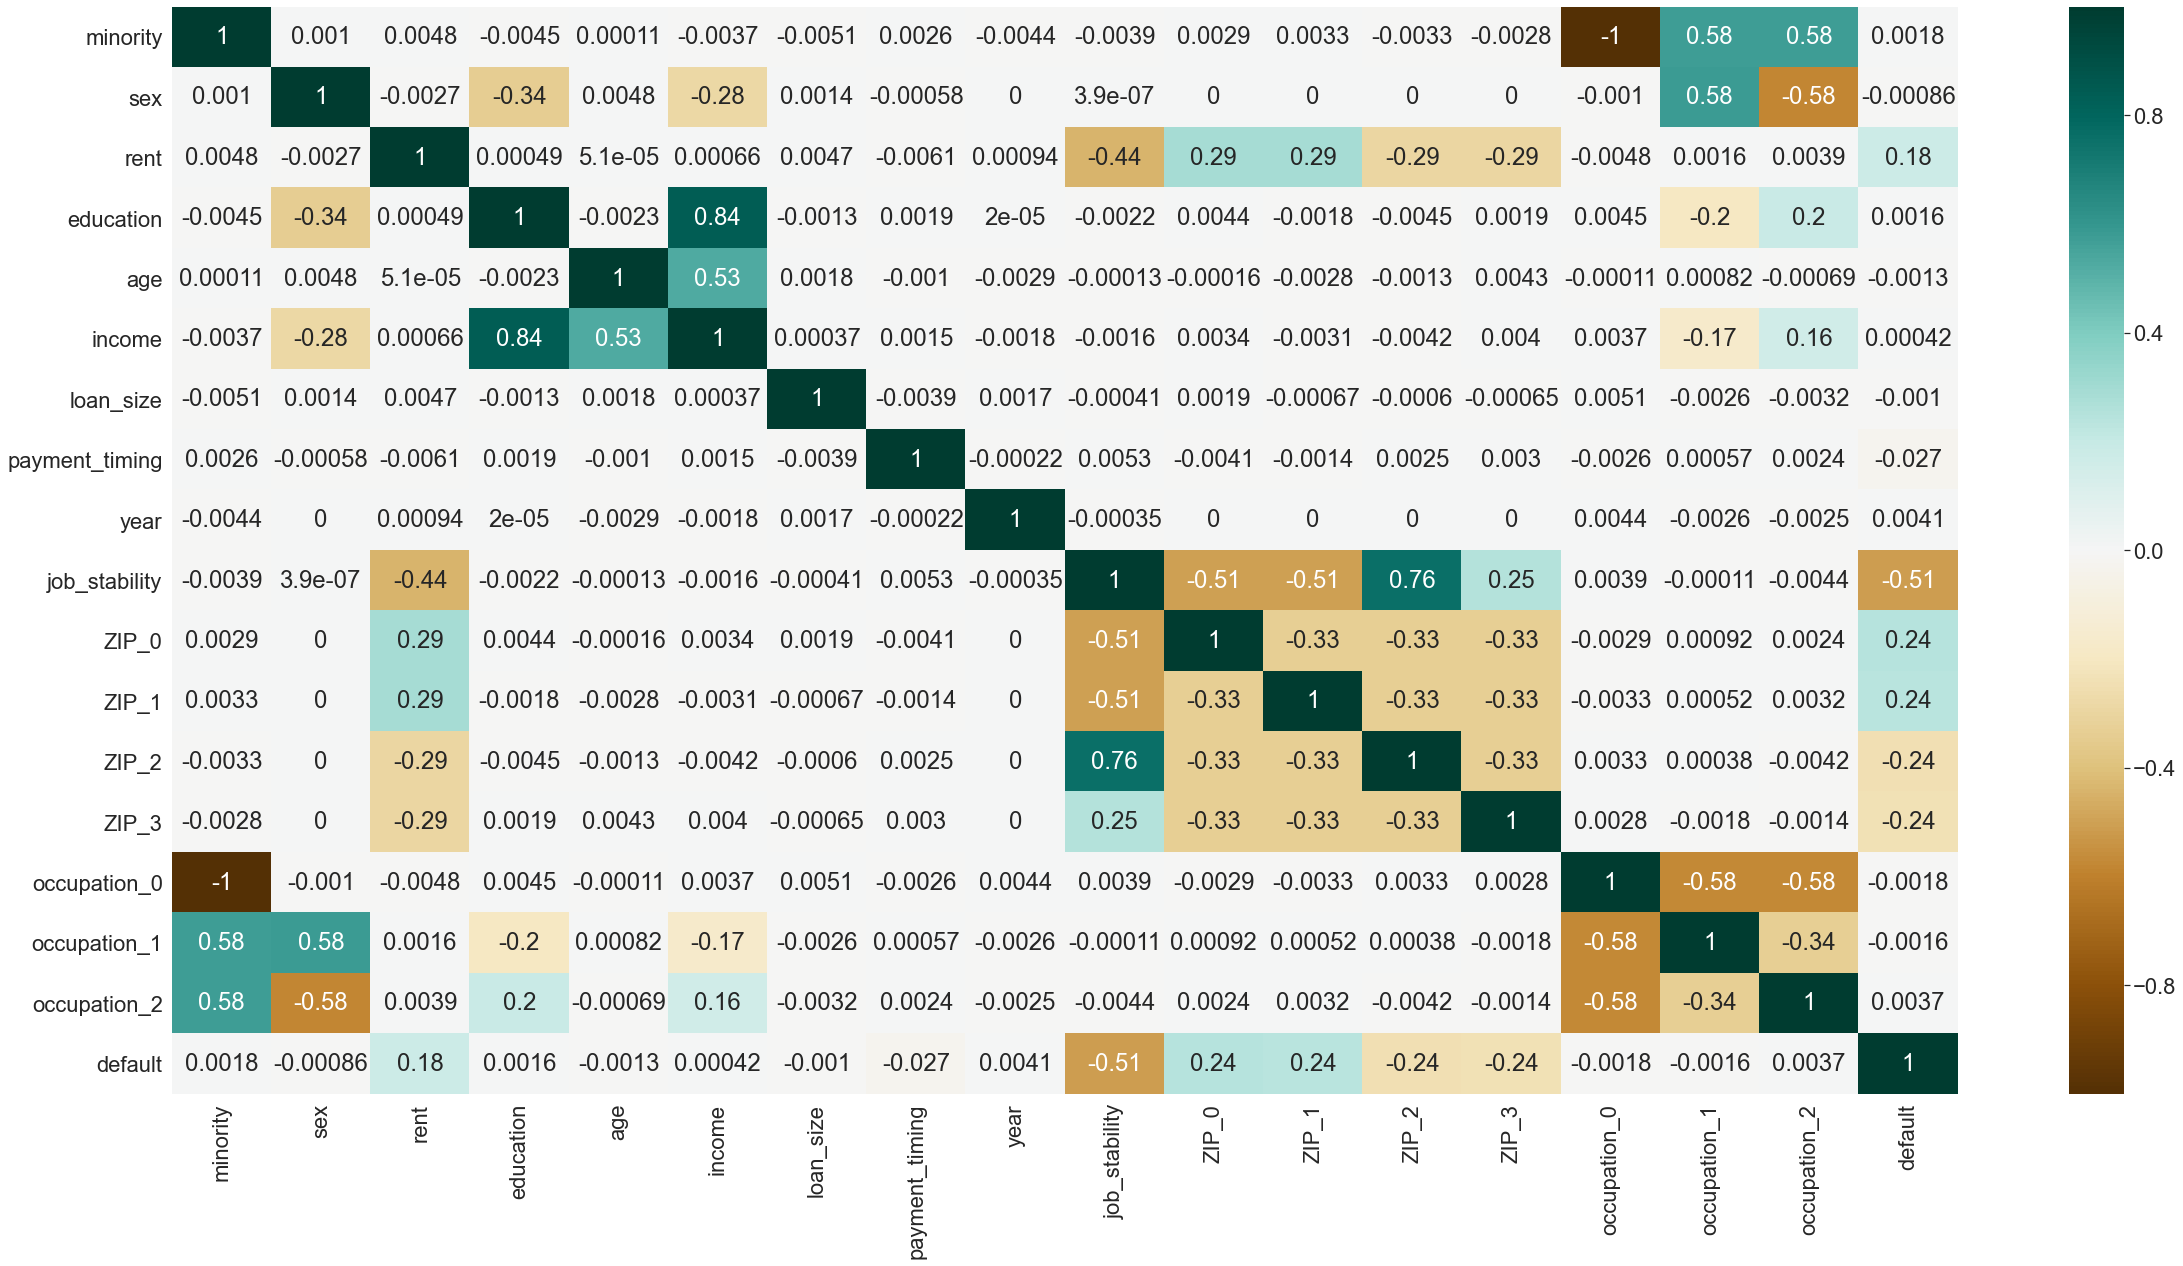

In [53]:
plt.figure(figsize=(40,20))
c= df_test.corr()
sns.set(font_scale= 2)
sns.heatmap(c,cmap="BrBG",annot=True)